In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette('viridis')
sns.set_style('whitegrid')

In [3]:
#Import the data
for i in range(1,2):
    loan_data = pd.read_csv('data/LoanStats'+str(i)+'.csv',sep=',',low_memory=False,skiprows=1)

In [4]:
#View Loan data from the range of 2012 to 2014
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,7550.0,7550.0,7550.0,36 months,16.24%,266.34,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,3000.0,3000.0,3000.0,36 months,12.85%,100.87,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4800.0,4800.0,4800.0,36 months,10.99%,157.13,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,14000.0,14000.0,14000.0,36 months,12.85%,470.71,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_data.info()

In [ ]:
loan_data.describe()

In [5]:
len(loan_data)

188183

In [6]:
#Idea is to remove Nan Columns which are within the threshold. 
#Here, the value 5 is just choosen as a parameter to be close to the length of the actual data.
#Most of the data which are not enclosed are removed
threshold = len(loan_data) - 5
threshold

188178

In [7]:
loan_data_filtered = loan_data.dropna(axis=1,thresh=threshold,how='all')

In [8]:
loan_data_filtered.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,7550.0,7550.0,7550.0,36 months,16.24%,266.34,C,C5,RENT,28000.0,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,3000.0,3000.0,3000.0,36 months,12.85%,100.87,B,B4,RENT,25000.0,...,1.0,Individual,0.0,0.0,0.0,2.0,0.0,N,Cash,N
2,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,RENT,81500.0,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,4800.0,4800.0,4800.0,36 months,10.99%,157.13,B,B2,MORTGAGE,39600.0,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,14000.0,14000.0,14000.0,36 months,12.85%,470.71,B,B4,RENT,88000.0,...,1.0,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N


In [9]:
loan_data_filtered.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,188181.000000,188181.00000,188181.000000,188181.000000,1.881810e+05,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000,...,188181.000000,188181.000000,188181.000000,188181.000000,188181.0,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000
mean,14354.139366,14351.61985,14339.619132,443.733006,7.223328e+04,17.060171,0.239626,0.803678,11.000808,0.106212,...,193.030959,22.368089,4170.530886,0.003172,1.0,0.002715,0.005266,8.366961,0.084785,0.014040
std,8114.766207,8112.60861,8107.012285,242.648831,5.182459e+04,7.597634,0.703730,1.032934,4.607592,0.406336,...,841.426274,127.617702,5848.542348,0.059182,0.0,0.058392,0.081690,524.934800,0.290168,0.241542
min,1000.000000,1000.00000,950.000000,4.930000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.00000,8000.000000,269.980000,4.500000e+04,11.340000,0.000000,0.000000,8.000000,0.000000,...,0.000000,0.000000,370.090000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12175.000000,12125.00000,12100.000000,398.210000,6.200000e+04,16.780000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,1006.530000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,20000.00000,19975.000000,578.310000,8.700000e+04,22.580000,0.000000,1.000000,14.000000,0.000000,...,0.000000,0.000000,6099.390000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,35000.00000,35000.000000,1408.130000,7.141778e+06,34.990000,29.000000,8.000000,62.000000,54.000000,...,39444.370000,6124.938000,35760.200000,4.000000,1.0,5.000000,5.000000,65000.000000,8.000000,53.000000


In [10]:
loan_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Data columns (total 47 columns):
loan_amnt                     188181 non-null float64
funded_amnt                   188181 non-null float64
funded_amnt_inv               188181 non-null float64
term                          188181 non-null object
int_rate                      188181 non-null object
installment                   188181 non-null float64
grade                         188181 non-null object
sub_grade                     188181 non-null object
home_ownership                188181 non-null object
annual_inc                    188181 non-null float64
verification_status           188181 non-null object
issue_d                       188181 non-null object
loan_status                   188181 non-null object
pymnt_plan                    188181 non-null object
purpose                       188181 non-null object
zip_code                      188181 non-null object
addr_state                    188181

In [11]:
loan_data_filtered.dropna(axis=0,how='all',inplace=True)

C:\Users\prakash\AppData\Local\Continuum\anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
loan_data_filtered.drop_duplicates()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,7550.0,7550.0,7550.000000,36 months,16.24%,266.34,C,C5,RENT,28000.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,3000.0,3000.0,3000.000000,36 months,12.85%,100.87,B,B4,RENT,25000.00,...,1.0,Individual,0.0,0.0,0.0,2.0,0.0,N,Cash,N
2,20800.0,20800.0,20800.000000,36 months,13.53%,706.16,B,B5,RENT,81500.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,4800.0,4800.0,4800.000000,36 months,10.99%,157.13,B,B2,MORTGAGE,39600.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,14000.0,14000.0,14000.000000,36 months,12.85%,470.71,B,B4,RENT,88000.00,...,1.0,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N
5,15000.0,15000.0,15000.000000,36 months,14.47%,516.10,C,C2,RENT,98000.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
6,11100.0,11100.0,11100.000000,36 months,14.98%,384.68,C,C3,MORTGAGE,90000.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
7,12000.0,12000.0,12000.000000,36 months,13.53%,407.40,B,B5,RENT,40000.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
8,9750.0,9750.0,9750.000000,36 months,13.98%,333.14,C,C1,RENT,26000.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
9,15000.0,15000.0,15000.000000,36 months,8.90%,476.30,A,A5,MORTGAGE,63000.00,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


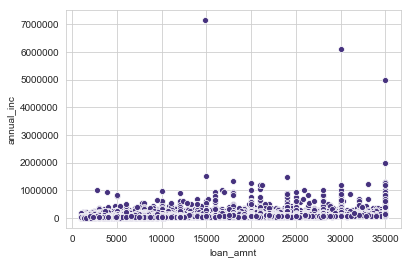

In [87]:
sns.scatterplot(x='loan_amnt',y='annual_inc',data=loan_data_filtered)

C:\Users\prakash\AppData\Local\Continuum\anaconda3\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


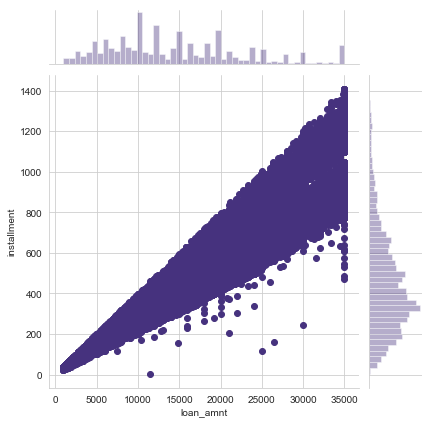

In [89]:
sns.jointplot(x='loan_amnt',y='installment',data=loan_data_filtered,kind='scatter')

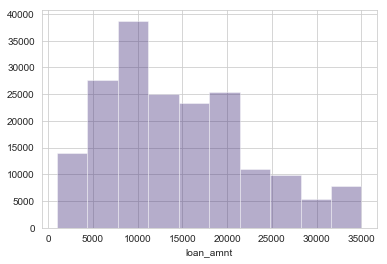

In [86]:
sns.distplot(loan_data_filtered.loan_amnt,bins=10,kde=False)

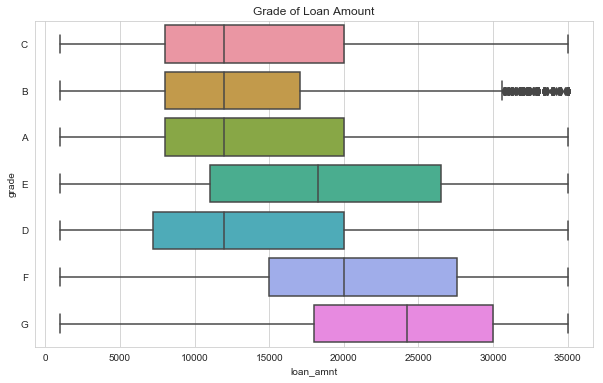

In [14]:
plt.figure(figsize=(10,6))
plt.title('Grade of Loan Amount')
sns.boxplot(x='loan_amnt',y='grade',data=loan_data_filtered)

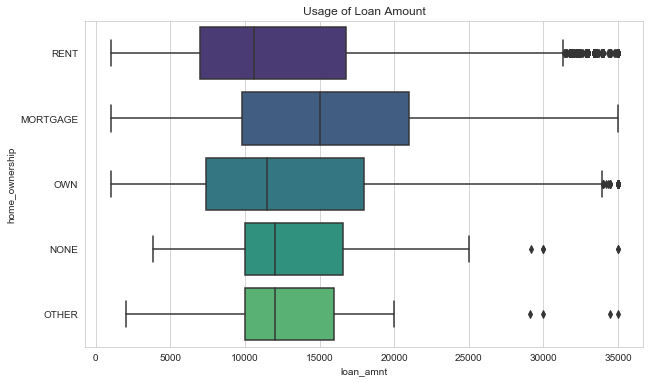

In [15]:
plt.figure(figsize=(10,6))
plt.title('Usage of Loan Amount')
sns.boxplot(x='loan_amnt',y='home_ownership',data=loan_data_filtered)

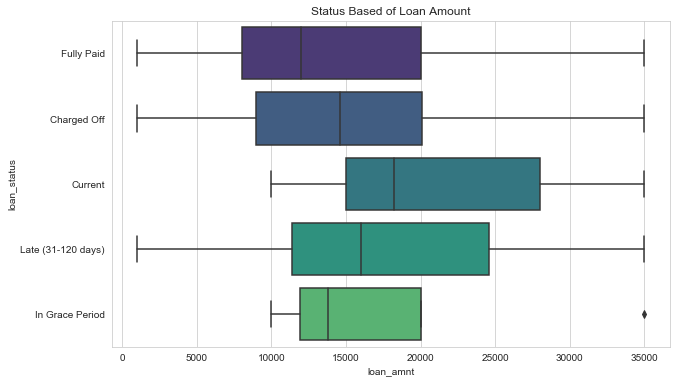

In [44]:
plt.figure(figsize=(10,6))
plt.title('Status Based of Loan Amount')
sns.boxplot(x='loan_amnt',y='loan_status',data=loan_data_filtered)

In [61]:
probStat = {}
def computeFreqStats(value):
     out = loan_data_filtered[loan_data_filtered.loan_status == value].grade.value_counts()
     probStat[value] ={'grade':out.index,'values':out.values}

In [63]:
for val in loan_data_filtered.loan_status.unique():
    computeFreqStats(val)

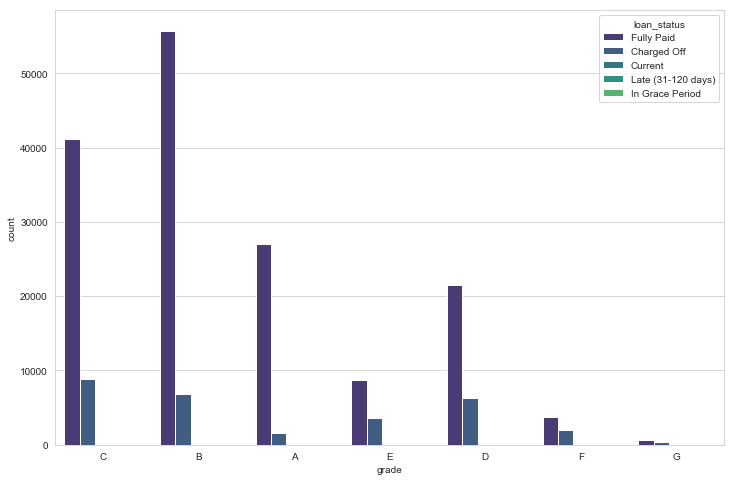

In [70]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade',hue='loan_status',data=loan_data_filtered)

In [16]:
loan_Statuses = loan_data_filtered.loan_status.value_counts()

In [17]:
df = pd.DataFrame({
    'status':loan_Statuses.index,
    'values': loan_Statuses.values
})

In [18]:
df.head()

,status,values
0,Fully Paid,158469
1,Charged Off,29657
2,Current,31
3,Late (31-120 days),20
4,In Grace Period,4


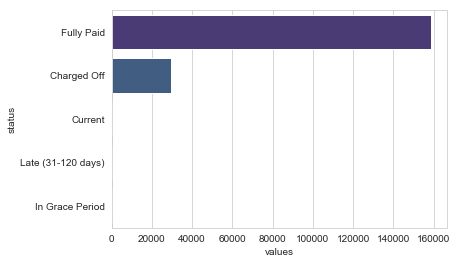

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x='values',y='status',data=df)

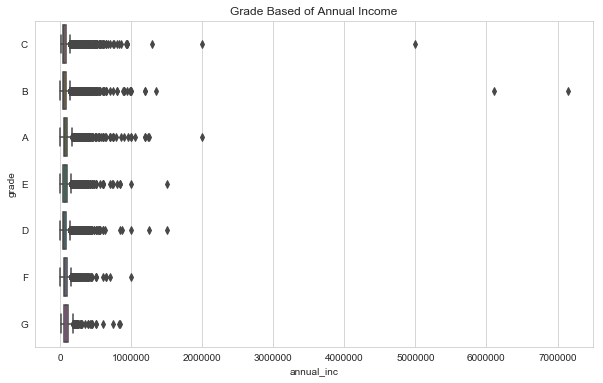

In [20]:
plt.figure(figsize=(10,6))
plt.title('Grade Based of Annual Income')
sns.boxplot(x='annual_inc',y='grade',data=loan_data_filtered)

In [21]:
### Normality Test #####
# H0: Loan amount is normally distributed across the dataset
# choosing alpha as 0.1 and 0.05 we will see if the assumption is true
from scipy import stats
x = np.asarray((loan_data_filtered.loan_amnt)).astype(np.int32)
y = np.asarray((loan_data_filtered.annual_inc)).astype(np.int32)
k2, p = stats.normaltest(y)
alpha = 1e-3

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


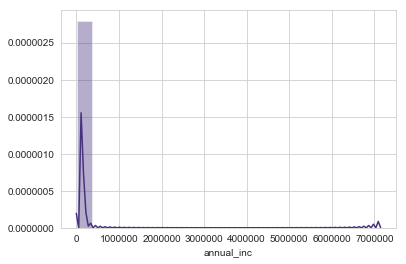

In [25]:
sns.distplot(loan_data_filtered.annual_inc,bins=20)

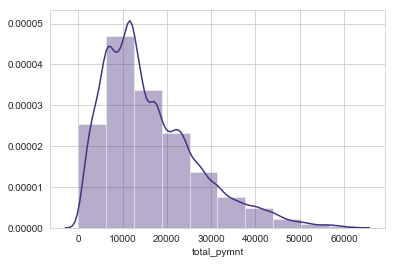

In [31]:
sns.distplot(loan_data_filtered.total_pymnt,bins=10)

In [95]:
# Compute the correlation matrix
corr = loan_data_filtered.corr()

def drawCorrelationPlot(corr):
    ''' Quickly plots correlation for the dataset'''
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 9))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

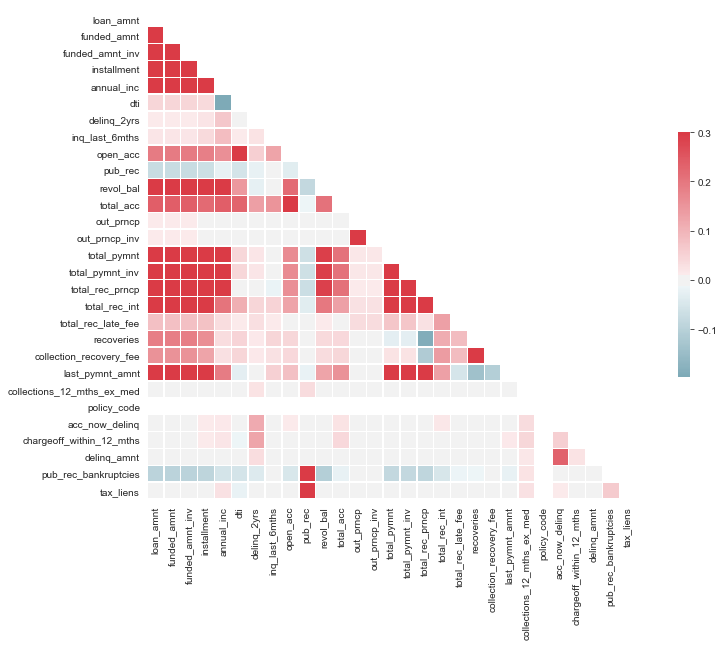

In [96]:
drawCorrelationPlot(corr)

In [ ]:
### By observing the corrrelations it is quite clear that 
### some of the columns are do not have any relationship and could be removed

### Col to remove:
''' 
policy_code
dti
delinq_2yrs
inq_last_6mnths
out_prncp
out_prncp_inv
collections_12_mths_ex_med
policy_code
delinq_amnt
tax_liens
sub_grade
'''

#################

loan_data_filtered.drop(columns=['policy_code',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'out_prncp',
'out_prncp_inv',
'collections_12_mths_ex_med',
'policy_code',
'delinq_amnt',
'tax_liens','chargeoff_within_12_mths','sub_grade'],inplace=True)

In [116]:
loan_data_filtered.info()
loan_data_filtered.debt_settlement_flag.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188181 entries, 0 to 188180
Data columns (total 36 columns):
loan_amnt                  188181 non-null float64
funded_amnt                188181 non-null float64
funded_amnt_inv            188181 non-null float64
term                       188181 non-null object
int_rate                   188181 non-null object
installment                188181 non-null float64
grade                      188181 non-null object
home_ownership             188181 non-null object
annual_inc                 188181 non-null float64
verification_status        188181 non-null object
issue_d                    188181 non-null object
loan_status                188181 non-null object
pymnt_plan                 188181 non-null object
purpose                    188181 non-null object
zip_code                   188181 non-null object
addr_state                 188181 non-null object
earliest_cr_line           188181 non-null object
open_acc                   188181 

array(['N', 'Y'], dtype=object)

In [117]:
loan_data_filtered.drop(columns=['zip_code','addr_state',
                                 'earliest_cr_line','application_type','hardship_flag','disbursement_method',
                                 'total_rec_late_fee'],inplace=True)

C:\Users\prakash\AppData\Local\Continuum\anaconda3\envs\snowflakes\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [119]:
loan_data_filtered.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,pub_rec_bankruptcies,debt_settlement_flag
0,7550.0,7550.0,7550.0,36 months,16.24%,266.34,C,RENT,28000.0,Not Verified,...,9600.454631,9600.45,7550.0,2050.45,0.0,0.0,529.67,0.0,0.0,N
1,3000.0,3000.0,3000.0,36 months,12.85%,100.87,B,RENT,25000.0,Verified,...,3181.548905,3181.55,3000.0,181.55,0.0,0.0,2677.23,0.0,2.0,N
2,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,RENT,81500.0,Verified,...,23926.640008,23926.64,20800.0,3126.64,0.0,0.0,13334.93,0.0,0.0,N
3,4800.0,4800.0,4800.0,36 months,10.99%,157.13,B,MORTGAGE,39600.0,Source Verified,...,5157.519457,5157.52,4800.0,357.52,0.0,0.0,3900.48,0.0,0.0,N
4,14000.0,14000.0,14000.0,36 months,12.85%,470.71,B,RENT,88000.0,Not Verified,...,16945.318783,16945.32,14000.0,2945.32,0.0,0.0,470.47,0.0,1.0,N


[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'other'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'house'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'car'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'wedding')]

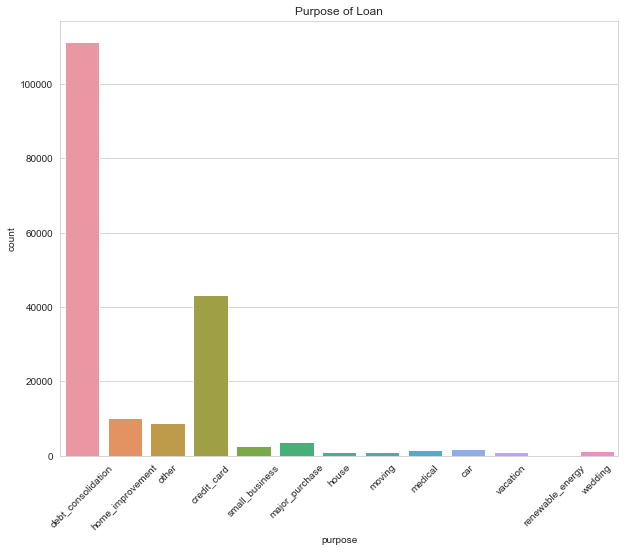

In [132]:
plt.figure(figsize=(10,8))
plt.title('Purpose of Loan')
p = sns.countplot(x='purpose',data=loan_data_filtered)
loc, labels = plt.xticks()
p.set_xticklabels(labels,rotation=45)

C:\Users\prakash\AppData\Local\Continuum\anaconda3\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


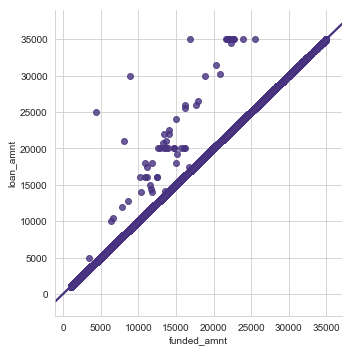

In [134]:
sns.lmplot(x='funded_amnt',y='loan_amnt',data=loan_data_filtered)